# Medical Insurance

## 1. Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__

('1.23.5', '1.5.3')

In [3]:
matplotlib.__version__, sns.__version__

('3.7.1', '0.12.2')

## 2. Load data

In [4]:
df = pd.read_csv('../data/insurance.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# df.shape, df.info(), df.describe(), df.columns, df.dtypes

## 3. EDA

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.2 Univariate Analysis

<Axes: xlabel='smoker', ylabel='count'>

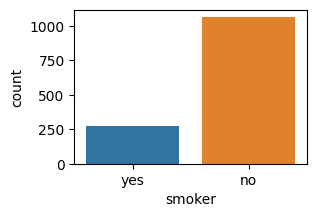

In [17]:
#countplot
plt.figure(figsize=(3, 2))
sns.countplot(data = df, x = 'smoker')

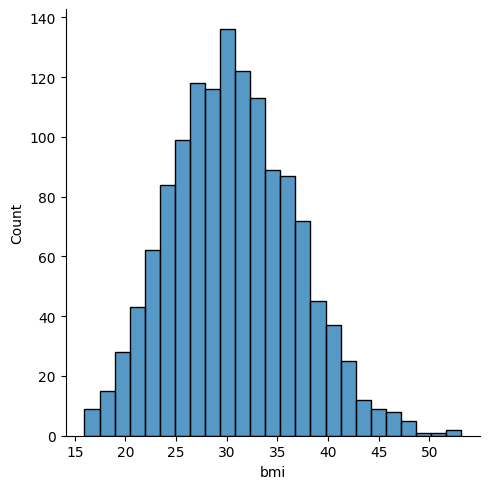

In [19]:
#distribution plot
sns.displot(data = df, x = 'bmi')

### 3.3 Multivariate Analysis

#### Easy one

Text(0.5, 0, 'Smoker')

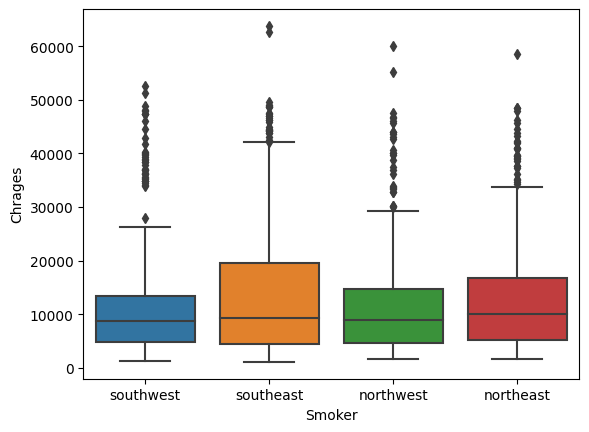

In [24]:
#boxplot
sns.boxplot(x = df['region'], y=df['charges'])
plt.ylabel("Chrages")
plt.xlabel("Smoker")

In [ ]:
#scatterplot
#cannot do because you have only one continuous value
# sns.scatterplot(x = df['?'], y=df['charges'], hue=df['?'])

#### Less Easy One

In [ ]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Do some label encoding here first

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])
df["status"].unique()

In [ ]:
le.transform(['Developed', 'Developing'])

In [ ]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### Predictive power score


In [ ]:
import ppscore as pps

In [ ]:
pps.__version__

In [ ]:
#just like machine learning

#remove any unnecessary x 
dfcopy = df.copy()
dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#call pps
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering

In [ ]:
## we will not do today, because we will talk about it during PCA or dimensionality reduction

## 5. Feature Selection

In [ ]:
df.columns

In [ ]:
# df.info()

In [25]:
#decide the features
X = df[ ['smoker']  ]
# for sklearn, X should be multi-dimensional (m, n)
# where m is number of samples
# n is number of features, it can be 1

#decide the target
y = df["charges"]  
#for sklearn, y should be one-dimensional (m, ) 
# where m is number of samples

In [26]:
X.shape, y.shape

((1338, 1), (1338,))

In [27]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [31]:
#train test split

#recall "always split first before preprocessing!"

#why? --> data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
X_train.shape, X_test.shape

((1204, 1), (134, 1))

In [33]:
y_train.shape, y_test.shape

((1204,), (134,))

## 6. Preprocessing

### Label encoding

In [43]:
## label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train['smoker'] = le.fit_transform(X_train['smoker'])


In [48]:
X_test['smoker'] = le.transform(X_test['smoker'])

### Filling missing values

In [ ]:
#yay!

### Scaling

In [45]:
#no need because your features are discrete

## 7. Model Selection

In [50]:
### Not so good way - no cross validation
### not recommended

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train) #fit means learn! #later on, you will learn
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))



MSE:  49911329.08108155
r2:  0.6382065098154122


In [53]:
### cross validation way!!

#step 1. define all the algorithms you wanna compare
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor   
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [54]:
#step 2. cross validate
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")


LinearRegression: Score: [-60429664.96057218 -65752516.64423519 -58374017.16467009
 -52116437.88195104 -45413924.02891637]; Mean: -56417312.13606898
SVR: Score: [-1.39177790e+08 -1.20825386e+08 -1.83775319e+08 -1.83939246e+08
 -1.66818429e+08]; Mean: -158907233.9137863
RandomForestRegressor: Score: [-54896078.45688266 -51047059.74933653 -52459896.37509426
 -65282976.62992884 -59438299.41843595]; Mean: -56624862.12593564
KNeighborsRegressor: Score: [-57806976.15883498 -65211332.92295489 -59577566.74440932
 -60445957.50733948 -60713765.14584075]; Mean: -60751119.69587588
DecisionTreeRegressor: Score: [-52649877.4821125  -62835031.26598461 -60199897.08948023
 -41776763.06710711 -69701830.82534105]; Mean: -57432679.946005106


In [55]:
#step 3: grid search
from sklearn.model_selection import GridSearchCV
#Gridsearch is just cross_validation but on one single model

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
              'n_estimators': [5, 6, 7, 8, 9, 10]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 7}

In [57]:
best_mse = grid.best_score_

In [58]:
best_mse

-56530462.758365616

## 8. Testing

In [59]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

49976175.55065055

In [60]:
r2_score(y_test, yhat)

0.6377364556016003

## 9. Analysis

In [61]:
rf = grid.best_estimator_

In [62]:
rf.feature_importances_

array([1.])

<BarContainer object of 1 artists>

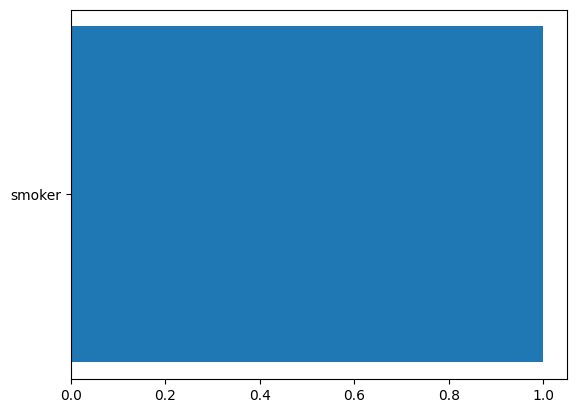

In [63]:
plt.barh(X.columns, rf.feature_importances_)

## 10. Inference

In [64]:
#step 1: save your model
import pickle

filename = 'chaky.chakysupermodel'
pickle.dump(grid, open(filename, 'wb'))

In [65]:
#step 2: load your model
loaded_model = pickle.load(open(filename, 'rb'))

In [67]:
#step 3: predict
sample = df[ ['smoker']].loc[13]

In [68]:
sample

smoker    no
Name: 13, dtype: object

In [69]:
sample_np = np.array([[1]]) 

In [70]:
answer = loaded_model.predict(sample_np)

In [71]:
answer

array([32570.60913512])

In [72]:
y = df[ ['charges']].loc[13]

In [73]:
y

charges    11090.7178
Name: 13, dtype: float64